In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout,Conv2D,MaxPool2D
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive

#Importing Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
DATA_DIR='/content/gdrive/MyDrive/Sign_Language_Recognition'

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
IMAGE_SIZE=224
BATCH_SIZE=32

In [ ]:
train_generator = datagen.flow_from_directory(directory=DATA_DIR, 
                                              target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                              color_mode='grayscale', 
                                              class_mode='categorical', 
                                              batch_size=BATCH_SIZE, 
                                              shuffle=True, 
                                              subset='training')

test_generator = datagen.flow_from_directory(directory=DATA_DIR, 
                                              target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                              color_mode='grayscale', 
                                              class_mode='categorical', 
                                              batch_size=BATCH_SIZE, 
                                              shuffle=False, 
                                              subset='validation')

Found 2012 images belonging to 36 classes.
Found 503 images belonging to 36 classes.


#Building The Model

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),input_shape=(train_generator.image_shape),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.20))
model.add(Dense(96,activation="relu"))
model.add(Dropout(0.20))
model.add(Dense(64,activation="relu"))
model.add(Dense(train_generator.num_classes,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               23888000  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Training the model

In [ ]:
EPOCHS=10

In [ ]:
history = model.fit(x=train_generator,
                    epochs=EPOCHS,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size)

Epoch 1/10
62/62 [==============================] - 428s 7s/step - loss: 3.4415 - accuracy: 0.0793
Epoch 2/10
62/62 [==============================] - 122s 2s/step - loss: 1.4955 - accuracy: 0.5463
Epoch 3/10
62/62 [==============================] - 122s 2s/step - loss: 0.6713 - accuracy: 0.7869
Epoch 4/10
62/62 [==============================] - 123s 2s/step - loss: 0.3636 - accuracy: 0.8810
Epoch 5/10
62/62 [==============================] - 122s 2s/step - loss: 0.2336 - accuracy: 0.9351
Epoch 6/10
62/62 [==============================] - 123s 2s/step - loss: 0.1824 - accuracy: 0.9366
Epoch 7/10
62/62 [==============================] - 123s 2s/step - loss: 0.1600 - accuracy: 0.9470
Epoch 8/10
62/62 [==============================] - 123s 2s/step - loss: 0.1222 - accuracy: 0.9597
Epoch 9/10
62/62 [==============================] - 123s 2s/step - loss: 0.0973 - accuracy: 0.9741
Epoch 10/10
62/62 [==============================] - 123s 2s/step - loss: 0.1233 - accuracy: 0.9631


In [ ]:
results = model.evaluate(x=test_generator)

16/16 [==============================] - 114s 8s/step - loss: 0.5321 - accuracy: 0.8410


In [ ]:
print(f'Validation Loss: {results[0]}')
print(f'Validation Accuracy: {results[1]}')

Validation Loss: 0.5320578217506409
Validation Accuracy: 0.8409543037414551


#Predicting classes for test dataset and model evaluation

In [ ]:
predict=model.predict(x=test_generator)

In [ ]:
pred=np.argmax(predict,axis=1)

In [ ]:
pred

array([24, 24, 24, 12, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, 13, 13,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2, 31,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6, 32, 32, 32,  6, 32, 32, 32, 32,  6,  6,  6,  6,  7,  4,  4,  4,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  4,  4,  8,  4,  4,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9, 23, 23, 23, 23, 23, 28, 28, 28, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 16, 16

In [ ]:
len(pred)

503

In [ ]:
print('Confusion Matrix:\n')
print(confusion_matrix(y_true=test_generator.classes, y_pred=pred))
print('\n\n')
print('Classification Report:\n')
print(classification_report(y_true=test_generator.classes, y_pred=pred))

Confusion Matrix:

[[ 9  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 14  0  0]
 [ 0  0  0 ...  0 14  0]
 [ 0  0  0 ...  0  0 13]]



Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        14
           1       1.00      0.86      0.92        14
           2       0.59      0.93      0.72        14
           3       0.93      1.00      0.97        14
           4       0.67      1.00      0.80        14
           5       1.00      1.00      1.00        14
           6       0.88      0.50      0.64        14
           7       1.00      0.79      0.88        14
           8       1.00      0.71      0.83        14
           9       1.00      1.00      1.00        14
          10       1.00      0.43      0.60        14
          11       1.00      1.00      1.00        14
          12       0.93      1.00      0.97        14
          13       0.82      1.00      0.

Predicting class of a single image from the test dataset

In [ ]:
img_path="/content/gdrive/MyDrive/Sign_Language_Recognition/2/hand1_2_bot_seg_2_cropped.png"

In [ ]:
img = cv2.imread(img_path)  # converts the image into a numerical matrix
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converting into Grayscale

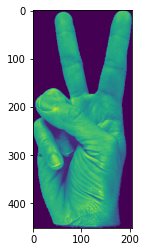

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
img = np.reshape(img, [1, IMAGE_SIZE, IMAGE_SIZE, 1])
img = img/255.

In [ ]:
class_confidence = model.predict(x=img)   # provides an array of predictions for each class

In [ ]:
class_confidence

array([[4.84473603e-05, 1.42745237e-04, 9.32276905e-01, 5.18046409e-06,
        2.87832086e-06, 1.37507950e-05, 1.77484136e-02, 1.37056915e-07,
        1.38024072e-08, 1.60191818e-10, 2.63103357e-06, 1.69763138e-04,
        1.36646577e-07, 4.06959686e-07, 1.21469078e-04, 1.85555909e-04,
        3.67184221e-08, 1.14546894e-09, 2.02869296e-06, 9.83063302e-08,
        6.16873568e-03, 1.36761509e-08, 9.54529445e-04, 5.44805254e-04,
        4.24281607e-05, 2.74011527e-05, 1.59601711e-06, 6.36728643e-08,
        1.31707784e-04, 7.19284965e-03, 1.35030466e-04, 2.10055672e-02,
        1.30342534e-02, 8.25707905e-11, 1.11753934e-07, 4.02183941e-05]],
      dtype=float32)

In [ ]:
class_index = int(np.argmax(class_confidence, axis=1)) 

In [ ]:
class_index

2

In [ ]:
classes = [x for x in test_generator.class_indices.keys()]
classes

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [ ]:
classes[class_index]

'2'

In [ ]:
class_confidence=np.squeeze(class_confidence)
class_confidence[class_index]*100

93.22769045829773

Saving the Model

In [ ]:
file_path = '/content/gdrive/My Drive/Sign_Language_Model/model_1.h5'
model.save(file_path)